Imports

In [ ]:
import os
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from sklearn.metrics import accuracy_score
from sys import getsizeof

In [ ]:
print(tf.__version__)

2.15.0


In [ ]:
num_of_features = 6
num_of_classes = 8
num_of_readings = 100

In [ ]:
# prompt: model for 3d tensor input

# Ignore this
model = keras.Sequential()
model.add(Flatten(input_shape=(num_of_readings, num_of_features, num_of_classes)))
model.add(Dense(128, activation='relu'))
model.add(Dense(num_of_classes, activation='softmax'))
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])


In [ ]:
# Shape of (10, 2, 6) -> (num_of_reading, num_of_classes, num_of_features)
y = [[[111, 112, 113, 114, 115, 116], [121, 122, 123, 124, 125, 126]],
      [[211, 212, 213, 214, 215, 216], [221, 222, 223, 224, 225, 226]],
      [[311, 312, 313, 314, 315, 316], [321, 322, 323, 324, 325, 326]],
      [[411, 412, 413, 414, 415, 416], [421, 422, 423, 424, 425, 426]],
      [[511, 512, 513, 514, 515, 516], [521, 522, 523, 524, 525, 526]],
      [[611, 612, 613, 614, 615, 616], [621, 622, 623, 624, 625, 626]],
      [[711, 712, 713, 714, 715, 716], [721, 722, 723, 724, 725, 726]],
      [[811, 812, 813, 814, 815, 816], [821, 822, 823, 824, 825, 826]],
      [[911, 912, 913, 914, 915, 916], [921, 922, 923, 924, 925, 926]],
      [[1011, 1012, 1013, 1014, 1015, 1016], [1021, 1022, 1023, 1024, 1025, 1026]]
      ]

In [ ]:
y = np.array(y)
print(y)

[[[ 111  112  113  114  115  116]
  [ 121  122  123  124  125  126]]

 [[ 211  212  213  214  215  216]
  [ 221  222  223  224  225  226]]

 [[ 311  312  313  314  315  316]
  [ 321  322  323  324  325  326]]

 [[ 411  412  413  414  415  416]
  [ 421  422  423  424  425  426]]

 [[ 511  512  513  514  515  516]
  [ 521  522  523  524  525  526]]

 [[ 611  612  613  614  615  616]
  [ 621  622  623  624  625  626]]

 [[ 711  712  713  714  715  716]
  [ 721  722  723  724  725  726]]

 [[ 811  812  813  814  815  816]
  [ 821  822  823  824  825  826]]

 [[ 911  912  913  914  915  916]
  [ 921  922  923  924  925  926]]

 [[1011 1012 1013 1014 1015 1016]
  [1021 1022 1023 1024 1025 1026]]]


In [ ]:
# prompt: [10, 6, 2]shape  numpy array

import numpy as np
x = np.random.rand(1, 10, num_of_classes, 3)
# print(x)
t = tf.Variable(y)
print(t)

NameError: name 'num_of_classes' is not defined

In [ ]:
tf.matmul(t[0], tf.transpose(t[0]))

In [ ]:
import torch

In [ ]:
weight_W = torch.randn(10, 2, 6)
input_x = torch.randn(10, 6, 1)
bias_b = torch.randn(10, 2, 1)
res = torch.bmm(weight_W, input_x) # Wx ---> result
res

tensor([[[ 1.5343],
         [ 1.6602]],

        [[-1.4151],
         [ 2.1010]],

        [[ 5.0055],
         [ 1.1730]],

        [[-5.1176],
         [ 5.6557]],

        [[ 2.1926],
         [ 2.5250]],

        [[ 5.6587],
         [-5.5781]],

        [[ 3.1048],
         [-5.1271]],

        [[-2.6200],
         [-5.6402]],

        [[ 4.7905],
         [ 0.7925]],

        [[-0.5542],
         [-2.0240]]])

In [ ]:
res2 = bias_b + res  # Wx + b ---> result
res2

tensor([[[ 0.6379],
         [ 0.3441]],

        [[-1.8687],
         [ 2.7890]],

        [[ 5.3002],
         [ 1.1330]],

        [[-4.3305],
         [ 4.1875]],

        [[ 1.2245],
         [ 0.4069]],

        [[ 3.0675],
         [-5.0873]],

        [[ 2.4247],
         [-3.7090]],

        [[-2.1849],
         [-6.4957]],

        [[ 3.7552],
         [ 1.8037]],

        [[ 0.1982],
         [-1.8944]]])

In [ ]:
res_activation = torch.sigmoid(res2)
res_activation

tensor([[[0.6543],
         [0.5852]],

        [[0.1337],
         [0.9421]],

        [[0.9950],
         [0.7564]],

        [[0.0130],
         [0.9850]],

        [[0.7729],
         [0.6003]],

        [[0.9555],
         [0.0061]],

        [[0.9187],
         [0.0239]],

        [[0.1011],
         [0.0015]],

        [[0.9771],
         [0.8586]],

        [[0.5494],
         [0.1307]]])

In [ ]:
label = np.random.choice([0.0, 1.0], size=(10, 2, 1))
label = torch.tensor(label, dtype = torch.float)
label

tensor([[[0.],
         [0.]],

        [[0.],
         [0.]],

        [[0.],
         [1.]],

        [[1.],
         [0.]],

        [[1.],
         [1.]],

        [[1.],
         [0.]],

        [[1.],
         [1.]],

        [[0.],
         [0.]],

        [[0.],
         [0.]],

        [[0.],
         [1.]]])

In [ ]:
loss = torch.nn.BCELoss()
loss(res_activation, label)

tensor(1.6188)

In [ ]:
weight_W = torch.randn(10, 2, 6)
input_x = torch.randn(10, 6, 1)
bias_b = torch.randn(10, 2, 1)
res = torch.bmm(weight_W, input_x) # Wx ---> result
res
res2 = bias_b + res  # Wx + b ---> result
res2
res_activation = torch.sigmoid(res2)
res_activation
loss = torch.nn.BCELoss()
loss(res_activation, label)

tensor(1.5125)

In [ ]:
torch.randint(0, 2, (10, 2, 1))

tensor([[[0],
         [1]],

        [[1],
         [1]],

        [[1],
         [1]],

        [[1],
         [1]],

        [[0],
         [1]],

        [[1],
         [1]],

        [[1],
         [1]],

        [[1],
         [0]],

        [[1],
         [0]],

        [[1],
         [0]]])

In [ ]:
# Ignore this
weight_W = torch.randn(10, 2, 6)
input_x = torch.randn(10, 6, 1)
bias_b = torch.randn(10, 2, 1)

logits = torch.bmm(weight_W, input_x) + bias_b
prediction = torch.sigmoid(logits)
loss = torch.nn.BCELoss()

label = np.random.choice([0.0, 1.0], size=(10, 2, 1))
label = torch.tensor(label, dtype = torch.float)

loss = torch.nn.BCELoss()
loss = loss(prediction, label)

torch.autograd.grad_fn(loss, (weight_W[0], bias_b[0]))
# with tf.GradientTape() as tape:
#   logits = torch.bmm(weight_W, input_x) + bias_b
#   prediction = torch.sigmoid(res2)
#   loss = loss(prediction, prediction)
# gradients = tape.gradient(tf.Variable(loss), [tf.Variable(weight_W), tf.Variable(bias_b)])
# optimizer.apply_gradients(zip(gradients, [tf.Variable(weight_W), tf.Variable(bias_b)]))

AttributeError: module 'torch.autograd' has no attribute 'grad_fn'

In [ ]:
# prompt: gradent decent with pytorch

import torch
import torch.nn as nn
import torch.optim as optim

# Define the model
class MyModel(nn.Module):
  def __init__(self):
    super(MyModel, self).__init__()
    self.linear = nn.Linear(10, 2)

  def forward(self, x):
    return self.linear(x)

# Instantiate the model
model = MyModel()

# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Generate some random data
x = torch.randn(10, 10)
y = torch.randint(0, 2, (10,))

# Train the model
for epoch in range(100):
  # Forward pass
  y_pred = model(x)

  # Compute the loss
  loss = criterion(y_pred, y)

  # Backward pass
  optimizer.zero_grad()
  loss.backward()

  # Update the parameters
  optimizer.step()

  # Print the loss
  print(f'Epoch: {epoch+1}, Loss: {loss.item():.4f}')


Epoch: 1, Loss: 0.6966
Epoch: 2, Loss: 0.6931
Epoch: 3, Loss: 0.6897
Epoch: 4, Loss: 0.6862
Epoch: 5, Loss: 0.6828
Epoch: 6, Loss: 0.6795
Epoch: 7, Loss: 0.6762
Epoch: 8, Loss: 0.6729
Epoch: 9, Loss: 0.6697
Epoch: 10, Loss: 0.6665
Epoch: 11, Loss: 0.6633
Epoch: 12, Loss: 0.6602
Epoch: 13, Loss: 0.6571
Epoch: 14, Loss: 0.6540
Epoch: 15, Loss: 0.6510
Epoch: 16, Loss: 0.6480
Epoch: 17, Loss: 0.6451
Epoch: 18, Loss: 0.6422
Epoch: 19, Loss: 0.6393
Epoch: 20, Loss: 0.6364
Epoch: 21, Loss: 0.6336
Epoch: 22, Loss: 0.6308
Epoch: 23, Loss: 0.6281
Epoch: 24, Loss: 0.6253
Epoch: 25, Loss: 0.6227
Epoch: 26, Loss: 0.6200
Epoch: 27, Loss: 0.6174
Epoch: 28, Loss: 0.6148
Epoch: 29, Loss: 0.6122
Epoch: 30, Loss: 0.6096
Epoch: 31, Loss: 0.6071
Epoch: 32, Loss: 0.6046
Epoch: 33, Loss: 0.6021
Epoch: 34, Loss: 0.5997
Epoch: 35, Loss: 0.5973
Epoch: 36, Loss: 0.5949
Epoch: 37, Loss: 0.5925
Epoch: 38, Loss: 0.5902
Epoch: 39, Loss: 0.5879
Epoch: 40, Loss: 0.5856
Epoch: 41, Loss: 0.5833
Epoch: 42, Loss: 0.5811
E

Explanation:

requires_grad=True: We set the requires_grad flag to True for weight_W and bias_b to tell PyTorch to track gradients for these tensors.
.backward(): We call the .backward() method on the loss tensor to compute the gradients.
Access Gradients: After calling .backward(), the gradients for the tensors with requires_grad=True are stored in their .grad attribute. You can access them as shown in the code.
By making these changes, you should be able to compute and access the gradients correctly.

In [ ]:
# Create a tensor of zeros with shape (100, 8, 6)
weight_W = torch.zeros(100, 2, 6, requires_grad=True, dtype = torch.float64) # Tell PyTorch to store gradients for these tensors
input_x = torch.randn(100, 6, 1, dtype = torch.float64)
bias_b = torch.zeros(100, 2, 1, requires_grad=True, dtype = torch.float64)

label = np.random.choice([0.0, 1.0], size=(100, 2, 1))
label = torch.tensor(label, dtype = torch.float)

loss_mat = []

for epoch in range(10000):
  # Forward Propagation
  logits = torch.bmm(weight_W, input_x) + bias_b
  prediction = torch.softmax(logits, dim = 1)

  # Loss Calculation
  loss_fn = torch.nn.CrossEntropyLoss()

  # Prediction
  loss = loss_fn(prediction, label)

  # Backward Propagation
  loss.backward() # Compute gradients

  loss_mat.append(loss.item())
  if epoch % 100 == 0:
    print("Epoch = ", epoch, " Loss = ", loss.item())

  # Update Weights
  with torch.no_grad():
    weight_W -= 0.0001 * weight_W.grad
    bias_b -= 0.0001 * bias_b.grad
  # print(weight_W.grad) # Access gradients for weight_W
  # print(bias_b.grad)   # Access gradients for bias_b

Epoch =  0  Loss =  0.6446268779207491
Epoch =  100  Loss =  0.6423346248838493
Epoch =  200  Loss =  0.6356015145381485
Epoch =  300  Loss =  0.6247498167907621
Epoch =  400  Loss =  0.6103860327332801
Epoch =  500  Loss =  0.5934221939099775
Epoch =  600  Loss =  0.5749886439761507
Epoch =  700  Loss =  0.5562465066014884
Epoch =  800  Loss =  0.5381931985786248
Epoch =  900  Loss =  0.5215470781934333
Epoch =  1000  Loss =  0.50672661259458
Epoch =  1100  Loss =  0.49389272441172033
Epoch =  1200  Loss =  0.48301772056877723
Epoch =  1300  Loss =  0.4739553584462491
Epoch =  1400  Loss =  0.4664986244366676
Epoch =  1500  Loss =  0.4604208824238853
Epoch =  1600  Loss =  0.45550157720279005
Epoch =  1700  Loss =  0.45154005779034306
Epoch =  1800  Loss =  0.4483613814705622
Epoch =  1900  Loss =  0.4458172700598175
Epoch =  2000  Loss =  0.4437844579208586
Epoch =  2100  Loss =  0.4421618555603875
Epoch =  2200  Loss =  0.4408673589564726
Epoch =  2300  Loss =  0.43983474768812497
E

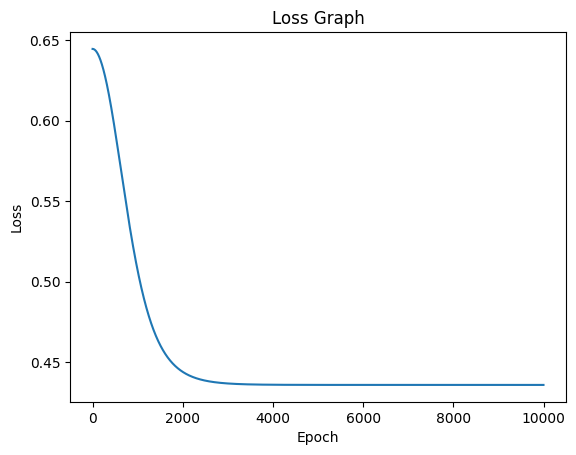

In [ ]:
# prompt: Plot a line graph for loss

import matplotlib.pyplot as plt

# Create the plot
plt.plot(np.array(loss_mat))

# Set the title and axis labels
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Show the plot
plt.show()


In [ ]:
# Connect to google drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


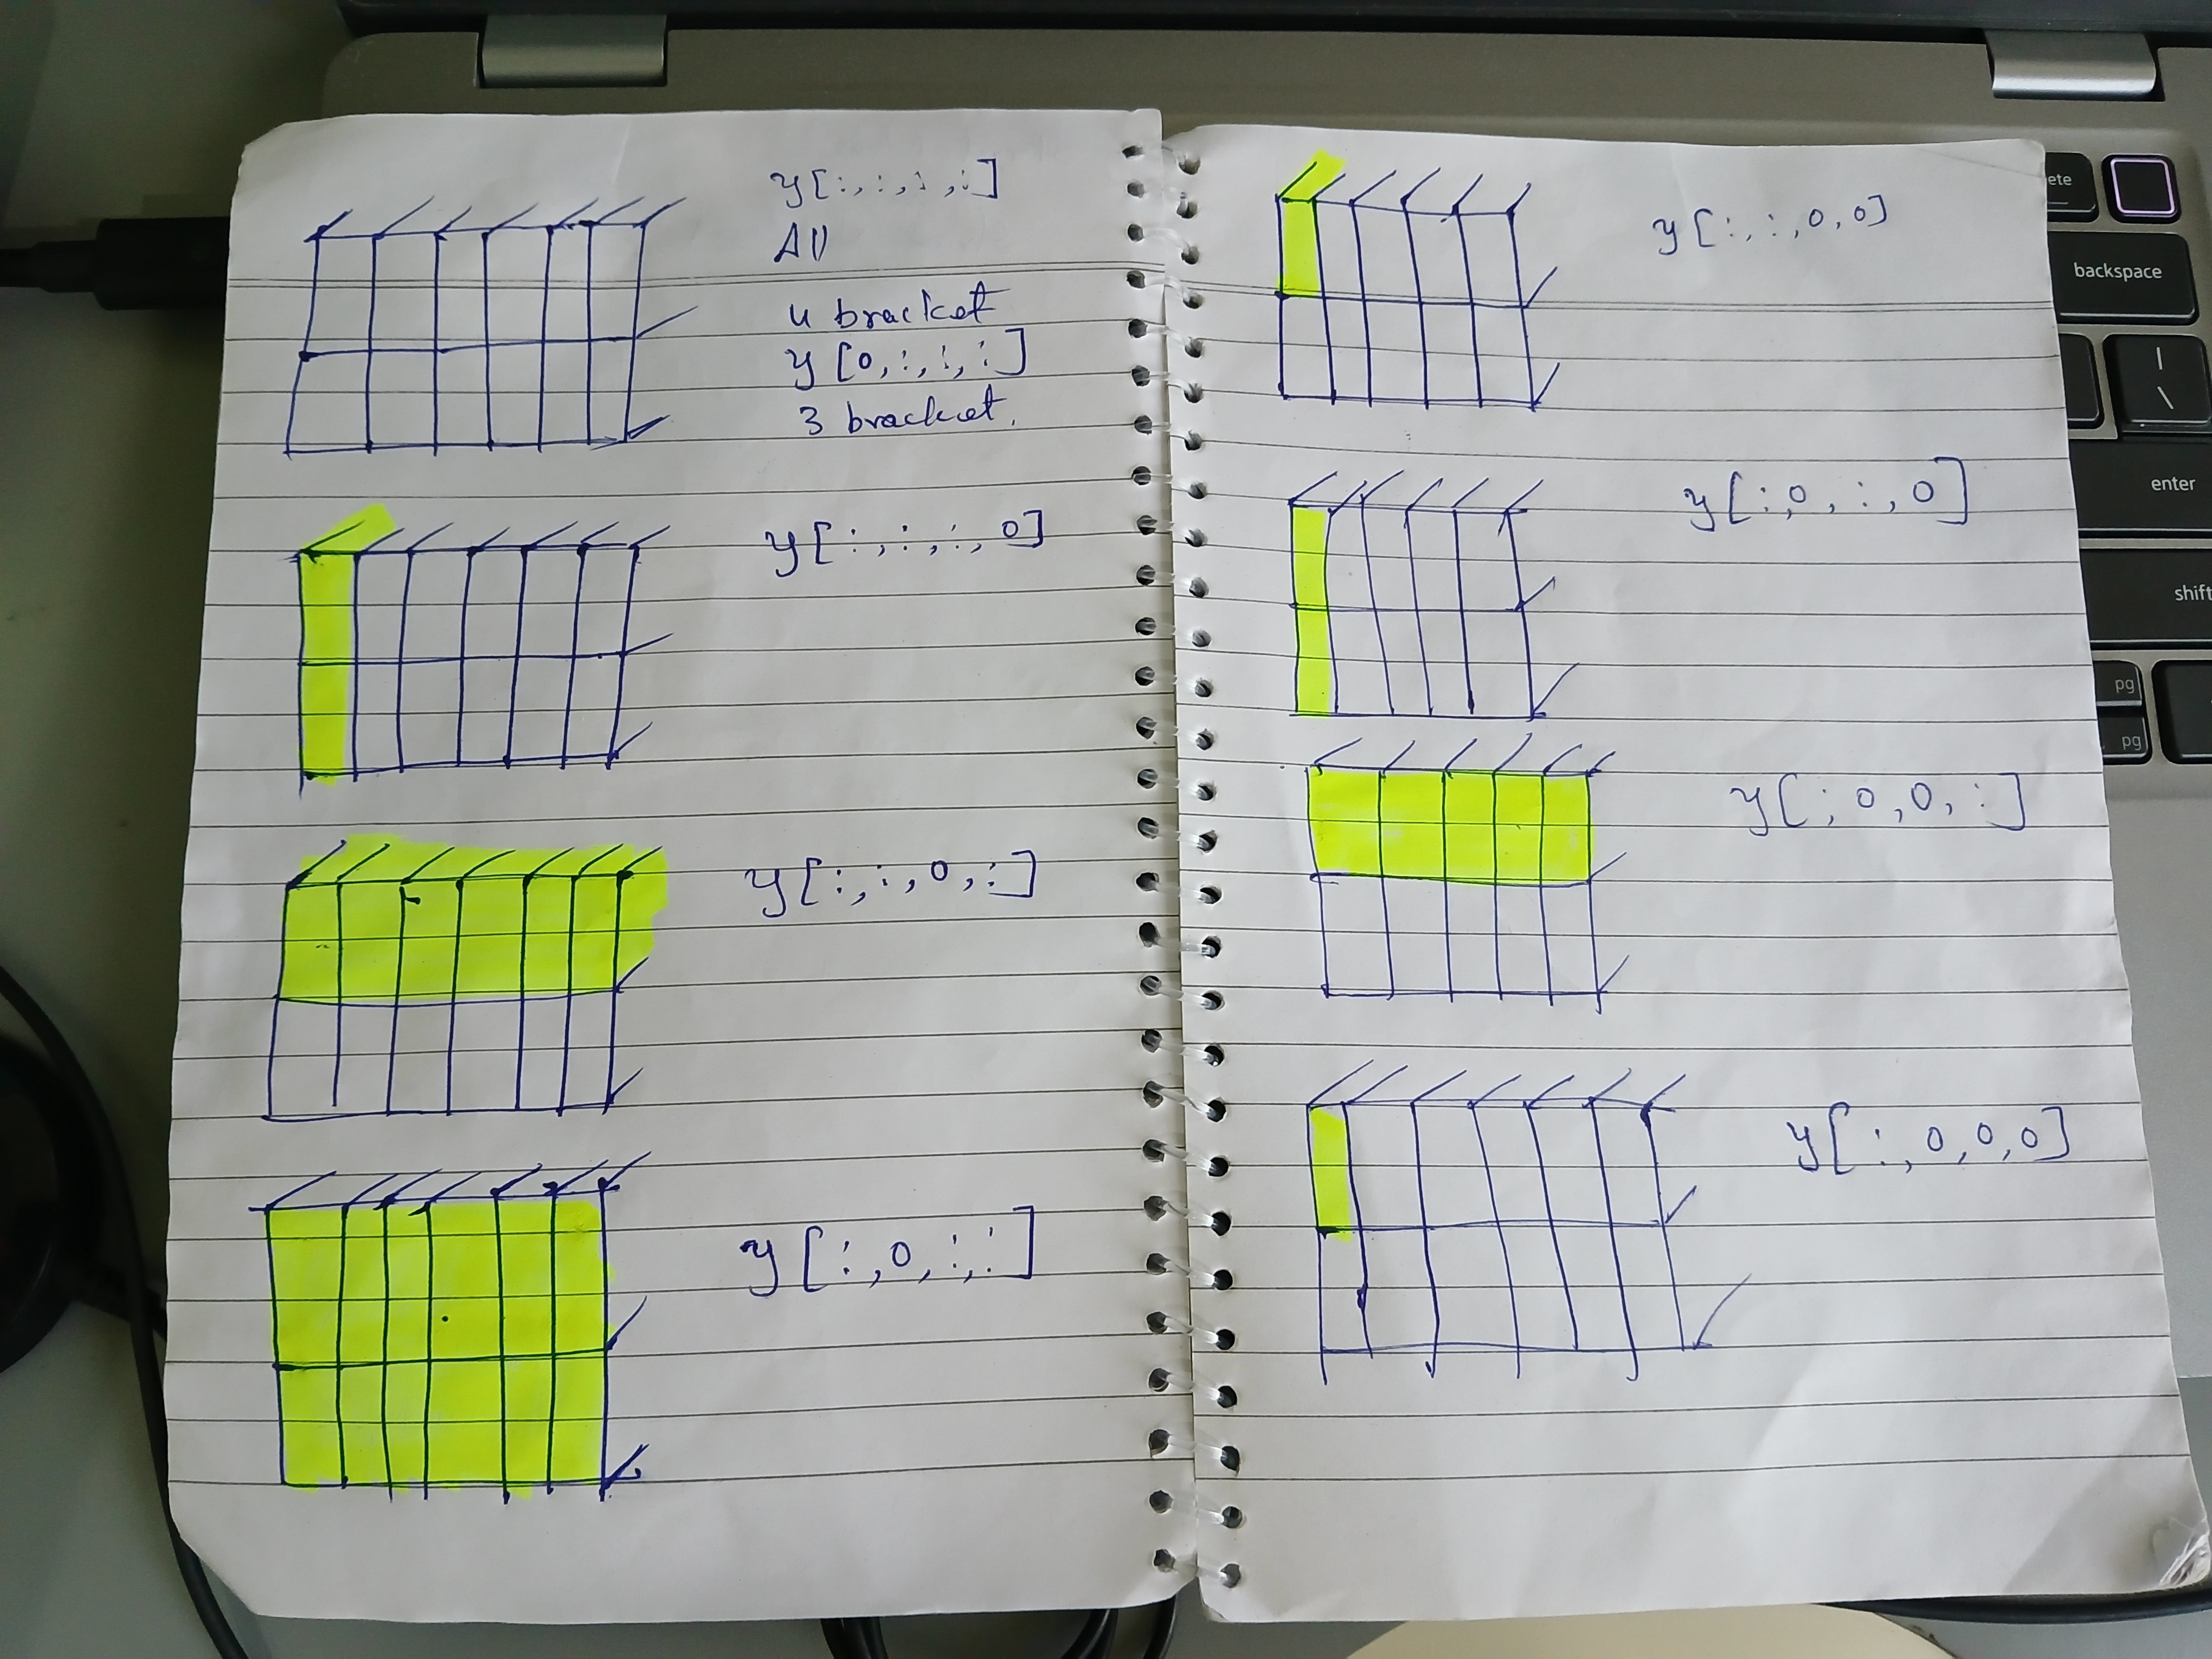

In [ ]:
# Dataset file directory
DIR = "/content/drive/MyDrive/Gait_Project_Data(CSV,JSON)/2nd Sem/Board above knee/Edge Impulse 100ms above knee"

In [ ]:
classes = []
for filename in os.listdir(DIR):
  if filename in classes:
    continue
  else:
    classes.append(filename)
print(classes)

['Abhishek Shrikanth', 'Abhishek Krishna Naik', 'Bhandavya', 'Gowri Priya', 'Meera', 'Pranay', 'Shreesh', 'Shwetha', 'Sirisha']


In [ ]:
import pandas as pd
primary_df = pd.DataFrame(columns = ["Gait_Data", "Gait_Label"])
primary_df

,Gait_Data,Gait_Label


In [ ]:
import numpy as np

In [ ]:

for category_File in os.listdir(DIR):
  for category_CSV in os.listdir(os.path.join(DIR, category_File)):
    # print(os.path.join(DIR, category_File, category_CSV))
    df = pd.read_csv(os.path.join(DIR, category_File, category_CSV), skiprows = 1, header = None)
    df = df.drop(df.columns[[0]], axis = 1)
    X = torch.tensor([df.values])
    X = X.view(100, 6, 1)
    # X = np.array([df.values]).reshape(100, 6, 1)
    # print(X)
    # Detach the gradient before converting to NumPy and then to list
    # X_detached = X.detach().numpy().tolist()
    new_row = {"Gait_Data" : X, "Gait_Label" : category_File}
    primary_df = primary_df._append(new_row, ignore_index = True)
    # X = torch.Variable(100, 8, 6, requires_grad=True) # Tell PyTorch to store gradients for these tensors


<ipython-input-17-88ff7ac4eabf>:6: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at ../torch/csrc/utils/tensor_new.cpp:274.)
  X = torch.tensor([df.values])


In [ ]:
primary_df

,Gait_Data,Gait_Label
0,"[[[tensor(-0.0729, dtype=torch.float64)], [ten...",Abhishek Shrikanth
1,"[[[tensor(0.0073, dtype=torch.float64)], [tens...",Abhishek Shrikanth
2,"[[[tensor(-0.1210, dtype=torch.float64)], [ten...",Abhishek Shrikanth
3,"[[[tensor(-0.0729, dtype=torch.float64)], [ten...",Abhishek Shrikanth
4,"[[[tensor(-0.0370, dtype=torch.float64)], [ten...",Abhishek Shrikanth
...,...,...
220,"[[[tensor(-0.1947, dtype=torch.float64)], [ten...",Sirisha
221,"[[[tensor(0.1653, dtype=torch.float64)], [tens...",Sirisha
222,"[[[tensor(-0.1344, dtype=torch.float64)], [ten...",Sirisha
223,"[[[tensor(-0.2066, dtype=torch.float64)], [ten...",Sirisha


In [ ]:
F.one_hot(torch.tensor([1]), num_classes=len(unique_classes)).view(9, 1)

RuntimeError: shape '[9, 1]' is invalid for input of size 225

In [ ]:
# prompt: Make a tensor of same rows

tensor = F.one_hot(torch.tensor([1]), num_classes=len(unique_classes))
# Make a tensor of same rows
same_rows_tensor = tensor.repeat(100, 1)
print(same_rows_tensor.view(100, 9, 1))


In [ ]:
import torch.nn.functional as F

# Get the unique classes
unique_classes = primary_df['Gait_Label'].unique()

# Create a dictionary to map class labels to one-hot encoded vectors
one_hot_dict = {cls: F.one_hot(torch.tensor([i]), num_classes=len(unique_classes)).view(9, 1) for i, cls in enumerate(unique_classes)}
one_hot_dict[cls]

KeyError: tensor([[[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]],

        [[0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [0],
         [1]]])

In [ ]:
# Create a dictionary to map class labels to one-hot encoded vectors
for i, cls in enumerate(unique_classes):
  tensor = F.one_hot(torch.tensor([i]), num_classes=len(unique_classes))

  # Make a tensor of same rows
  same_rows_tensor = tensor.repeat(100, 1)
  one_hot_dict = {cls: same_rows_tensor}
  # print(same_rows_tensor.view(100, 9, 1))

In [ ]:
# One hot encoding with pytorch

import torch.nn.functional as F

# Get the unique classes
unique_classes = primary_df['Gait_Label'].unique()

# Create a dictionary to map class labels to one-hot encoded vectors

one_hot_dict = {cls: F.one_hot(torch.tensor([i]), num_classes=len(unique_classes)) for i, cls in enumerate(unique_classes)}

# Apply one-hot encoding to the "Gait_Label" column
primary_df['Gait_Label'] = primary_df['Gait_Label'].apply(lambda cls: one_hot_dict[cls].repeat(100, 1).view(100, 9, 1).to(dtype = float))

# Print the modified DataFrame
# print(primary_df)


In [ ]:
primary_df["Gait_Label"][0].dtype

torch.float64

In [ ]:
primary_df.to_csv("primary_df.csv")

In [ ]:
# Shuffle the rows of pandas

primary_df = primary_df.sample(frac=1).reset_index(drop=True)

In [ ]:
primary_df.shape[0]

225

In [ ]:
# Create a tensor of zeros with shape (100, 8, 6)
weight_W = torch.zeros(100, 9, 6, requires_grad=True, dtype = torch.float64) # Tell PyTorch to store gradients for these tensors
input_x = primary_df['Gait_Data']
# bias_b = torch.zeros(100, 9, 1, requires_grad=True, dtype = torch.float64)

# label = np.random.choice([0.0, 1.0], size=(100, 2, 1))
# label = torch.tensor(label, dtype = torch.float)

loss_mat = []

for epoch in range(10000):
  for i in range(primary_df.shape[0]):
    input_x = primary_df['Gait_Data'][i]
    label = primary_df['Gait_Label'][i]

    # Forward Propagation
    logits = torch.bmm(weight_W, input_x) # + bias_b
    prediction = torch.softmax(logits, dim = 1)

    # Loss Calculation
    loss_fn = torch.nn.CrossEntropyLoss()

    # Prediction
    loss = loss_fn(prediction, label)

    # Backward Propagation
    loss.backward() # Compute gradients


    # Update Weights
    with torch.no_grad():
      weight_W -= 1 * weight_W.grad
      # bias_b -= 1 * bias_b.grad
  loss_mat.append(loss.item())
  if (epoch + 1) % 100 == 0 or epoch == 0:
    print("Epoch = ", epoch + 1, " Loss = ", loss.item())
    # print(weight_W.grad) # Access gradients for weight_W
    # print(bias_b.grad)   # Access gradients for bias_b

Epoch =  1  Loss =  2.197306615641303
Epoch =  100  Loss =  1.7344319489167415
Epoch =  200  Loss =  1.7188916752595658
Epoch =  300  Loss =  1.7159735679395782
Epoch =  400  Loss =  1.7121753800677855
Epoch =  500  Loss =  1.701222543854287
Epoch =  600  Loss =  1.7019543946061089
Epoch =  700  Loss =  1.7013663832655768
Epoch =  800  Loss =  1.7012122661109146
Epoch =  900  Loss =  1.7008996487519454
Epoch =  1000  Loss =  1.700717241673936
Epoch =  1100  Loss =  1.7008090113031693
Epoch =  1200  Loss =  1.7010963914205763
Epoch =  1300  Loss =  1.7009551691699456
Epoch =  1400  Loss =  1.7012757590521108
Epoch =  1500  Loss =  1.7011303689732347
Epoch =  1600  Loss =  1.7011537788751514
Epoch =  1700  Loss =  1.701427380673135
Epoch =  1800  Loss =  1.7011500455890922
Epoch =  1900  Loss =  1.7016966127598891
Epoch =  2000  Loss =  1.7014448652135803
Epoch =  2100  Loss =  1.7016528756291809
Epoch =  2200  Loss =  1.7012031480496659
Epoch =  2300  Loss =  1.701178514641632
Epoch =  

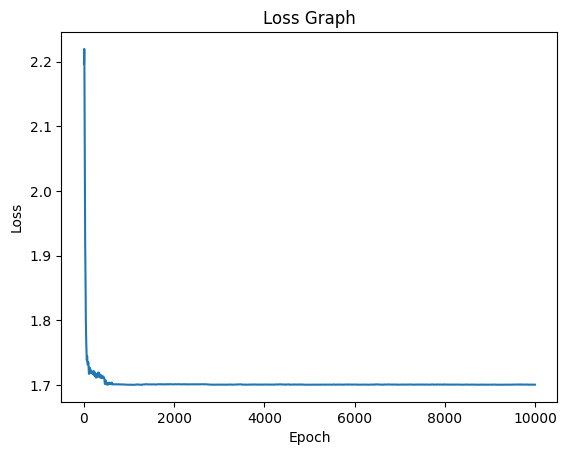

In [ ]:
# Plot a line graph for loss

import matplotlib.pyplot as plt

# Create the plot
plt.plot(np.array(loss_mat))

# Set the title and axis labels
plt.title("Loss Graph")
plt.xlabel("Epoch")
plt.ylabel("Loss")

# Show the plot
plt.show()


In [ ]:
# prompt: How to group unique value with count in pytorch

import torch

# Create a tensor with some duplicate values
tensor = torch.tensor([1, 2, 3, 2, 1, 4, 3, 2, 5])

# Get the unique values and their counts
unique_values, counts = torch.unique(tensor, return_counts=True)

# Print the results
print("Unique values:", unique_values)
print("Counts:", counts)

       count
value       
a          3
b          2
c          1


In [ ]:
# Get max of each row in pytorch tensor

max_values, max_index = torch.max(prediction, 1)
max_index
pd.DataFrame(torch.unique(max_index, return_counts=True))

,0,1,2,3,4,5,6,7,8
0,tensor(0),tensor(1),tensor(2),tensor(3),tensor(4),tensor(5),tensor(6),tensor(7),tensor(8)
1,tensor(4),tensor(3),tensor(1),tensor(4),tensor(1),tensor(67),tensor(1),tensor(15),tensor(4)


-------------------

Abhishek Shrikanth = **40-60** and Wrong one are spreaded to all

Abhishek Krishna Naik =  **40-60** and Wrong one are spreaded to all

Bandhavya = **40-60** and Wrong one are spreaded to all

Gowri Priya = **30-40** and wrong one are Meera, and Shreesh

Meera = **20-30** and wrong one with Gowri, Pranay and Shreesh

Pranay = **45-70** and wrong one with Meera

Shreesh = **20-40** and wrong one are with Meera

Shwetha = **30-40** and wrong one is spreaded

Sirisha = **30-45** and Wrong one is spreaded

-----------------

In [ ]:
ind = 149
input_x = primary_df['Gait_Data'][ind]
label = primary_df['Gait_Label'][ind]

# Forward Propagation
logits = torch.bmm(weight_W, input_x) # + bias_b
prediction = torch.softmax(logits, dim = 1)
# print(torch.sigmoid(logits) * 100)
# print(label)
label_values, label_max_index = torch.max(label, 1)
# label_max_index
print(pd.DataFrame(torch.unique(label_max_index, return_counts=True)))
prediction_values, prediction_max_index = torch.max(prediction, 1)
# prediction_max_index
print(pd.DataFrame(torch.unique(prediction_max_index, return_counts=True)))

NameError: name 'ww' is not defined

In [ ]:
classes

['Abhishek Shrikanth',
 'Abhishek Krishna Naik',
 'Bhandavya',
 'Gowri Priya',
 'Meera',
 'Pranay',
 'Shreesh',
 'Shwetha',
 'Sirisha']

In [ ]:
avh= "/content/drive/MyDrive/Gait_Project_Data(CSV,JSON)/2nd Sem/Board above knee/Edge Impulse 100ms above knee/Abhishek Krishna Naik/Abhishek_Krishna_Naik0.csv"

In [ ]:
df = pd.read_csv(avh, skiprows = 1, header = None)
df = df.drop(df.columns[[0]], axis = 1)
df.head(5)
# X = torch.tensor([df.values])
# X = X.view(100, 6, 1)
# X
X = np.array([df.values]).reshape(100, 6, 1)
X

array([[[ 1.07727051e-02],
        [ 2.30072021e-01],
        [ 8.52050781e-02],
        [ 5.27954102e-03],
        [-1.31225586e-03],
        [ 1.49536133e-03]],

       [[ 6.80541992e-03],
        [ 2.34893799e-01],
        [ 9.70458984e-02],
        [ 3.54003906e-03],
        [ 2.53295898e-03],
        [ 1.64794922e-03]],

       [[ 6.98852539e-03],
        [ 2.30010986e-01],
        [ 9.89379883e-02],
        [ 3.38745117e-03],
        [ 2.25830078e-03],
        [ 1.58691406e-03]],

       [[ 5.52368164e-03],
        [ 2.23419189e-01],
        [ 9.68017578e-02],
        [ 3.57055664e-03],
        [ 6.71386719e-04],
        [ 1.77001953e-03]],

       [[-6.65283203e-03],
        [ 2.18505859e-01],
        [ 8.96606445e-02],
        [ 3.99780273e-03],
        [-1.73950195e-03],
        [ 1.80053711e-03]],

       [[-5.00488281e-03],
        [ 2.20733643e-01],
        [ 9.07592773e-02],
        [ 3.99780273e-03],
        [-1.92260742e-03],
        [ 1.61743164e-03]],

       [[ 2.7465

In [ ]:
df

,timestamp,acc.x,acc.y,acc.z,gyro.x,gyro.y,gyro.z
0,0,0.010773,0.230072,0.085205,0.005280,-0.001312,0.001495
1,10,0.006805,0.234894,0.097046,0.003540,0.002533,0.001648
2,20,0.006989,0.230011,0.098938,0.003387,0.002258,0.001587
3,30,0.005524,0.223419,0.096802,0.003571,0.000671,0.001770
4,40,-0.006653,0.218506,0.089661,0.003998,-0.001740,0.001801
...,...,...,...,...,...,...,...
95,950,-0.028931,0.250427,0.073792,-0.000977,-0.030487,0.022949
96,960,0.028076,0.275726,0.056122,-0.006470,-0.037811,0.028076
97,970,0.138855,0.295471,0.097961,-0.014618,-0.028015,0.022827
98,980,0.133301,0.285431,0.116150,-0.016693,-0.023804,0.023041


In [ ]:
pd.read_csv('')

-------

**1.**  3-D matrix of shape Shape of (10, 2, 6) ->
(num_of_reading, num_of_classes, num_of_features) **Input**


**2.**    Weight of shape (10, 6, 2) All of zeros.


**3.**    If requieed then we will pass to NN.


**4.**    Do Gradient Decent on predicition.

-----------------

In [ ]:
t[0][0].shape

TensorShape([6])

In [ ]:
x[0][0].T.shape

(10, 6)

In [ ]:
x[0][0].shape

(6, 10)

In [ ]:
x.shape

(1, 2, 6, 100)

In [ ]:
y.shape

(1, 10, 2, 6)

In [ ]:
y[0,0,0,0]

111

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(1, input_shape=[1, 2, 6, 10]))
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(100))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(2))

model.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_31 (Dense)            (None, 1, 2, 6, 1)        11        
                                                                 
 dense_32 (Dense)            (None, 1, 2, 6, 10)       20        
                                                                 
 dense_33 (Dense)            (None, 1, 2, 6, 100)      1100      
                                                                 
 flatten_2 (Flatten)         (None, 1200)              0         
                                                                 
 dense_34 (Dense)            (None, 2)                 2402      
                                                                 
Total params: 3533 (13.80 KB)
Trainable params: 3533 (13.80 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss=SparseCategoricalCrossentropy(), metrics=['accuracy'])

In [ ]:
# y = keras.utils.to_categorical(1, 2)
model.fit(x, 2, epochs=1)

ValueError: Failed to find data adapter that can handle input: <class 'numpy.ndarray'>, <class 'int'>